# SPX Analysis: Average Daily Return After Negative Week

In [8]:

import yfinance as yf
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.ticker import FixedLocator


## Downloading SPX Data

In [3]:

spx_data = yf.download('^GSPC', start='1980-01-01', end='2024-08-26')
spx_data.head()


[*********************100%%**********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
1980-01-02,0.0,108.430000,105.290001,105.760002,105.760002,40610000
1980-01-03,0.0,106.080002,103.260002,105.220001,105.220001,50480000
1980-01-04,0.0,107.080002,105.089996,106.519997,106.519997,39130000
1980-01-07,0.0,107.800003,105.800003,106.809998,106.809998,44500000
1980-01-08,0.0,109.290001,106.290001,108.949997,108.949997,53390000


## Calculating Returns

In [4]:

spx_data['Adj Close'] = spx_data['Adj Close'].ffill()


spx_data['Daily Return'] = spx_data['Adj Close'].pct_change()


spx_data['Weekly Return'] = spx_data['Adj Close'].resample('W-FRI').ffill().pct_change()

spx_data = spx_data.dropna(subset=['Weekly Return'])

spx_data['Next Week Avg Daily Return'] = spx_data['Daily Return'].shift(-5).rolling(window=5).mean()

negative_week_returns = spx_data.loc[spx_data['Weekly Return'].shift(1) < 0, :]
negative_week_returns.head()


C:\Users\ashda\AppData\Local\Temp\ipykernel_8504\3964102702.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  spx_data['Next Week Avg Daily Return'] = spx_data['Daily Return'].shift(-5).rolling(window=5).mean()


,Open,High,Low,Close,Adj Close,Volume,Daily Return,Weekly Return,Next Week Avg Daily Return
Date,,,,,,,,,
1980-02-22,0.0,116.459999,113.430000,115.040001,115.040001,48210000,-0.002082,-0.003206,0.002189
1980-02-29,0.0,114.120003,111.769997,113.660004,113.660004,38810000,0.011660,-0.011996,-0.000700
1980-03-07,0.0,108.959999,105.989998,106.900002,106.900002,50950000,-0.016107,-0.059476,0.001532
1980-03-14,0.0,106.489998,104.010002,105.430000,105.430000,35180000,-0.001799,-0.013751,0.003347
1980-03-21,0.0,103.730003,101.550003,102.309998,102.309998,32220000,-0.007855,-0.029593,0.005146


## Calculating Yearly Averages

In [5]:

yearly_avg_return = negative_week_returns['Next Week Avg Daily Return'].resample('Y').mean() * 10000  # convert to basis points
yearly_avg_return.head()

C:\Users\ashda\AppData\Local\Temp\ipykernel_8504\1223455132.py:2: FutureWarning: 'Y' is deprecated and will be removed in a future version, please use 'YE' instead.
  yearly_avg_return = negative_week_returns['Next Week Avg Daily Return'].resample('Y').mean() * 10000  # convert to basis points


Date
1980-12-31    11.675695
1981-12-31     7.018864
1982-12-31     7.980027
1983-12-31     3.098455
1984-12-31    11.926434
Freq: YE-DEC, Name: Next Week Avg Daily Return, dtype: float64

## Plotting the Data

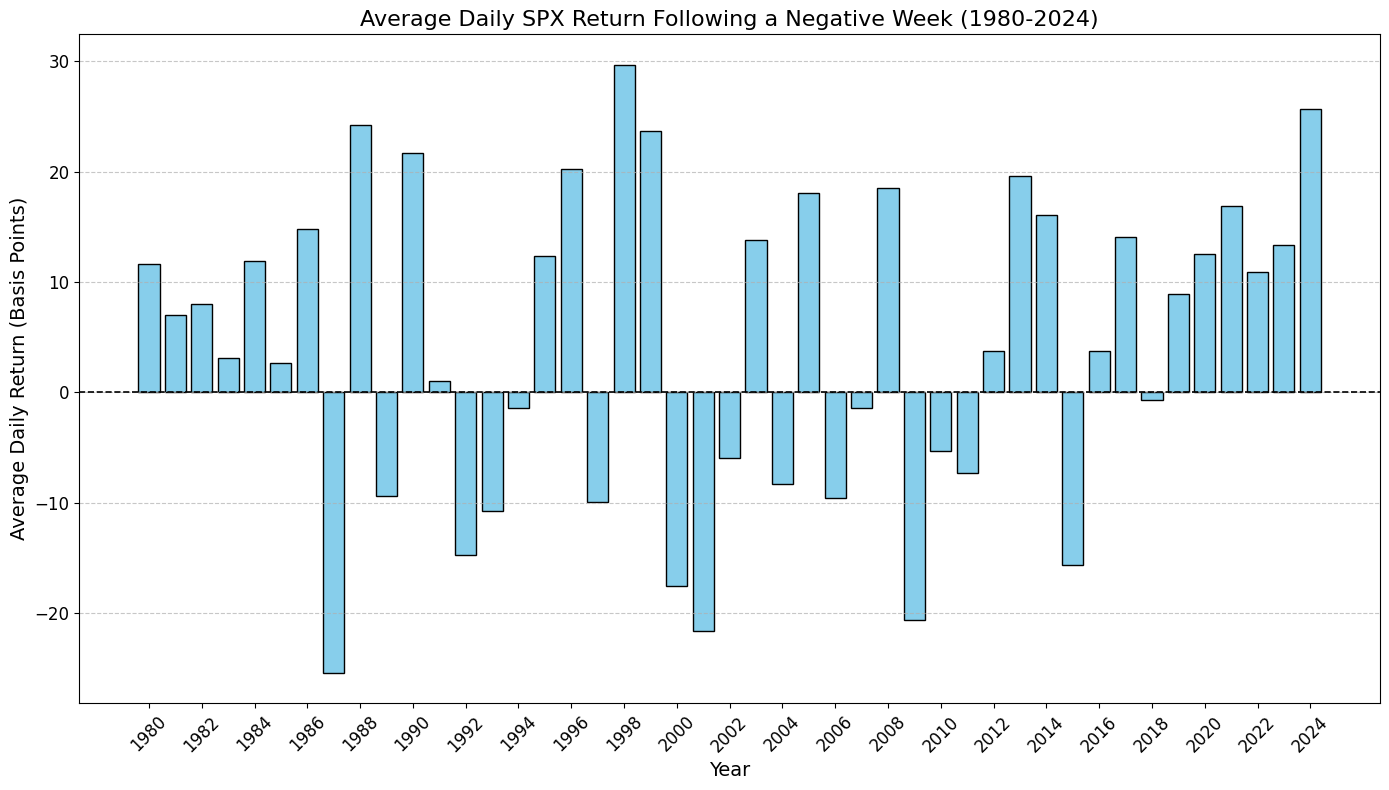

In [9]:

# Extract the year for plotting and drop any NaN values
yearly_avg_return_clean = yearly_avg_return.dropna()
years = yearly_avg_return_clean.index

# Define x-axis ticks every two years
start_year = years.min()
end_year = years.max()
tick_years = range(start_year, end_year + 1, 2)  # Every 2 years

# Create the plot
plt.figure(figsize=(14, 8))
plt.bar(years, yearly_avg_return_clean, color='skyblue', edgecolor='black')

# Add horizontal line at y=0
plt.axhline(0, color='black', linewidth=1.2, linestyle='--')

# Set title and labels
plt.title('Average Daily SPX Return Following a Negative Week (1980-2024)', fontsize=16)
plt.xlabel('Year', fontsize=14)
plt.ylabel('Average Daily Return (Basis Points)', fontsize=14)

# Set x-axis ticks
plt.gca().xaxis.set_major_locator(FixedLocator(tick_years))
plt.xticks(fontsize=12, rotation=45)
plt.yticks(fontsize=12)

# Add gridlines for better readability
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Tight layout for better spacing
plt.tight_layout()

